> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Project: Investigate TMDB Data Analysis¶

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. and in particular,


### Question(s) for Analysis
In this project we'll go through the Dataset in order to answer the below questions:

What's the average movies runtime throughout the decades?

Who's the most successful director ever?


In [12]:
import pandas as pd
import numpy as np
import requests
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
sns.set(color_codes = True)

<a id='wrangling'></a>
## Data Wrangling

Let's take a deep look at our Dataset to ask the right questions. But first, let's import the tools we're gonna need to get the job done


In [13]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09



### Data Cleaning
> To make sure you'll get correct results, you gotta clean and arrange your data properly first
 

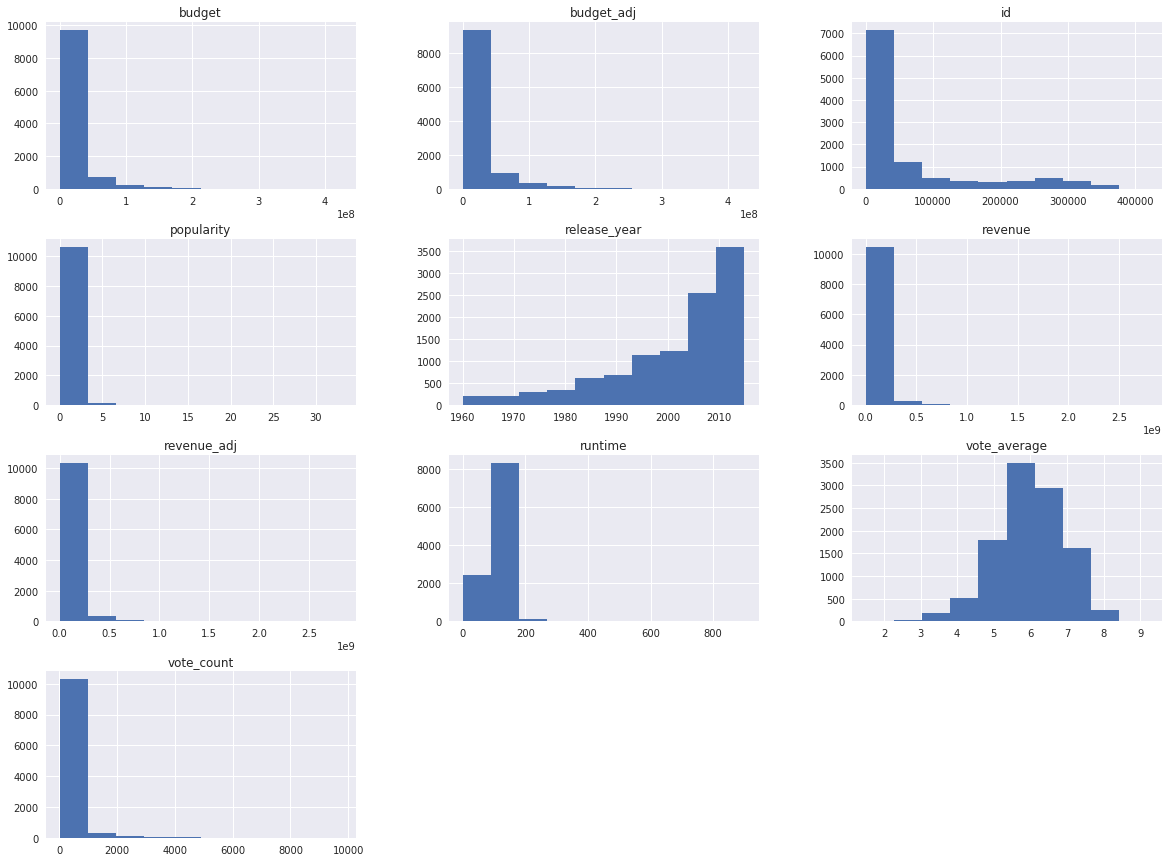

In [15]:
df.hist(figsize=(20, 15));


In [16]:
df.shape


(10866, 21)

In [17]:
list(df.columns)


['id',
 'imdb_id',
 'popularity',
 'budget',
 'revenue',
 'original_title',
 'cast',
 'homepage',
 'director',
 'tagline',
 'keywords',
 'overview',
 'runtime',
 'genres',
 'production_companies',
 'release_date',
 'vote_count',
 'vote_average',
 'release_year',
 'budget_adj',
 'revenue_adj']

In [18]:
df.drop(['popularity','cast','tagline','overview','production_companies','homepage','vote_count'],axis=1, inplace=True)
df.head(2)

,id,imdb_id,budget,revenue,original_title,director,keywords,runtime,genres,release_date,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,150000000,1513528810,Jurassic World,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,6/9/15,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,150000000,378436354,Mad Max: Fury Road,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,5/13/15,7.1,2015,1.379999e+08,3.481613e+08


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
id                10866 non-null int64
imdb_id           10856 non-null object
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
director          10822 non-null object
keywords          9373 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(3), int64(5), object(6)
memory usage: 1.2+ MB


In [20]:
df.describe()

,id,budget,revenue,runtime,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,1.462570e+07,3.982332e+07,102.070863,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,3.091321e+07,1.170035e+08,31.381405,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000000e+00,0.000000e+00,0.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.000000e+00,0.000000e+00,90.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.000000e+00,0.000000e+00,99.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,1.500000e+07,2.400000e+07,111.000000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,4.250000e+08,2.781506e+09,900.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [21]:
print(df.duplicated().sum())

1


In [22]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9349 entries, 0 to 10865
Data columns (total 14 columns):
id                9349 non-null int64
imdb_id           9349 non-null object
budget            9349 non-null int64
revenue           9349 non-null int64
original_title    9349 non-null object
director          9349 non-null object
keywords          9349 non-null object
runtime           9349 non-null int64
genres            9349 non-null object
release_date      9349 non-null object
vote_average      9349 non-null float64
release_year      9349 non-null int64
budget_adj        9349 non-null float64
revenue_adj       9349 non-null float64
dtypes: float64(3), int64(5), object(6)
memory usage: 1.1+ MB


In [23]:
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

0


As we can see, around 50% of the revenue and budget values are 0. And in order to solve this issue we either replace it with the mean or drop all the missing rows. However, since it's almost half of the data, the outcome won't be reliable. So, we'll consider the 0 values in revenue as if those movies didn't gain any revenue at all and the given values are actually, correct.

<a id='eda'></a>
## Exploratory Data Analysis
Now we have cleaned our dataset, and It's time to analyze it and answer our questions one by one.


### Research Question 1 (What's the average movies runtime throughout the decades?)

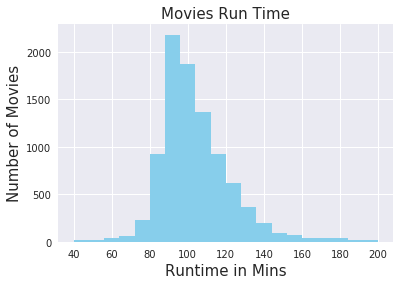

In [24]:
plt.hist(df['runtime'], range=(40,200), bins=20, color = "skyblue")
plt.title('Movies Run Time', fontsize = 15)
plt.xlabel('Runtime in Mins', fontsize = 15)
plt.ylabel('Number of Movies', fontsize = 15)
plt.show()

##Ok, so most overall movies' runtime is 90 minutes, but has it always been the most popular?



In [27]:
# Now we'll get the average runtime of all the movies in each year

grouped_movies = df['runtime'].groupby(df['release_year']).describe()

# we got the movies grouped

In [28]:
# now let's get the average, the minimum and the maximum

avg_runtime_by_year = grouped_movies ['mean']
avg_runtime_min = grouped_movies ['mean'] - grouped_movies ['std']
avg_runtime_max = grouped_movies ['mean'] + grouped_movies ['std']

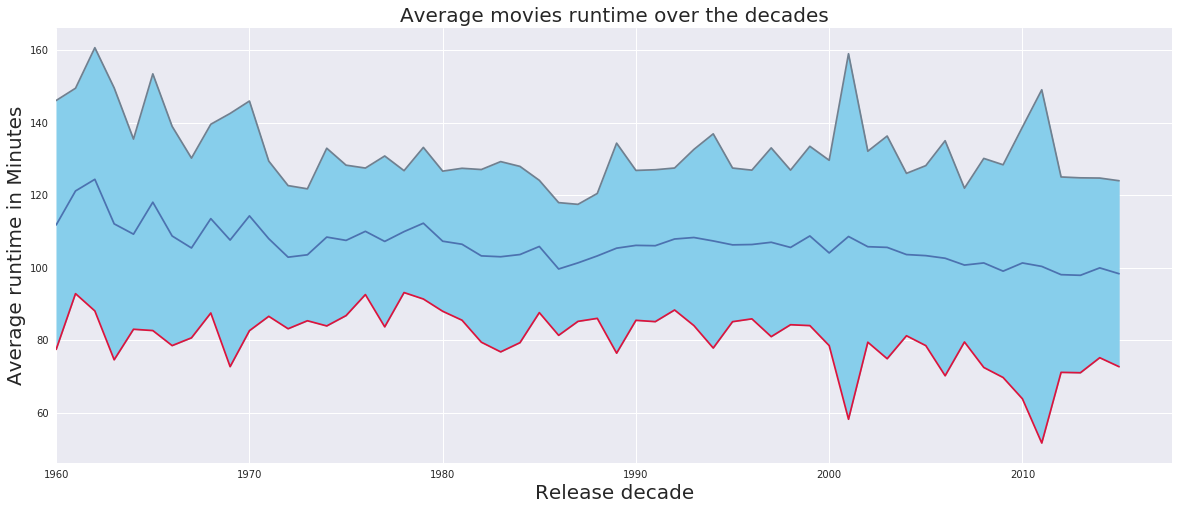

In [29]:
fig, x = plt.subplots(figsize=(20,8))
x.plot(avg_runtime_by_year)
x.plot(avg_runtime_min, color = 'crimson')
x.plot(avg_runtime_max, color = 'slategray')
x.fill_between(grouped_movies.index, avg_runtime_min, avg_runtime_max, color = 'skyblue')
x.set_title('Average movies runtime over the decades', fontsize = 20)
x.set_xlabel('Release decade', fontsize = 20)
x.set_ylabel('Average runtime in Minutes', fontsize = 20)
x.set_xlim(1960)
plt.show()


That's about right, 90 to 120 minutes seems like the average throughout the decades



### Research Question 2  Who's the most successful director ever?

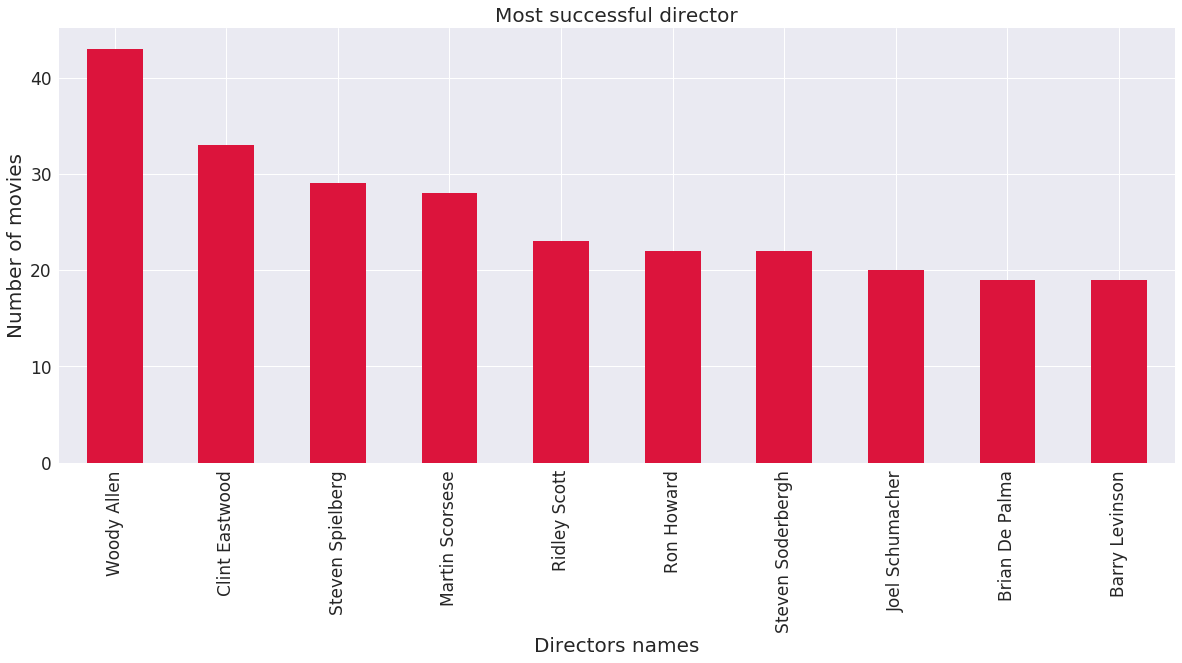

In [30]:
# Now we'll count the number of each time a director's name was mentioned, to know the number of movies he made

df['director'].value_counts().head(10).plot.bar(figsize=(20,8), fontsize=17, color='crimson');
plt.title('Most successful director', fontsize = 20)
plt.xlabel('Directors names', fontsize = 20)
plt.ylabel('Number of movies', fontsize = 20)
plt.show()

from the given data, the director with most movies in the list is 'Woody Allen'. but that's debateable.



<a id='conclusions'></a>
## Conclusions
At the beggining of the project we stated 2 questions, but in order to get to the answeres we had to go through the dataset wrandling cleaning, and analyzing. And since we're done with all of that, let's see how we answered them:

What's the average movies runtime throughout the decades?
The most popular movies' runtime has always been around 90 minutes and the average is up to 120 minutes.

Who's the most successful director ever?
Considering only this dataset, It was 'Woody Allen' but that's debateable.

## Limitations¶

Due to some missing values in the dataset and also not including all the information about all the movies ever made, this analysis only applies on the information from (TMDB.com). an in case we got more information we'll have better insights about the movies industry.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [32]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0